# Attitude Geographic Map

#### Motivation:
refine attitude for elfin fgm calibration, because my boss doesn't like the idea of cone 😭
#### Overview:
this code generates vectors one a geographic map around a given vector
#### Method:
- gengerate a geographic map around origin (lat = 0, lon = 0), need to input width and step of the map
- rotate the map so that origin is aligned with the given vector

***Created on:** May 5, 2023

In [6]:
%matplotlib widget

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def cart2sphere(x, y, z):
    
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r) # polar angle in radians
    phi = np.arctan2(y, x) # azimuthal angle, in radians

    return r, theta, phi

In [9]:
def sphere2cart(r, theta, phi):

    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return x, y, z

In [10]:
def rotate_vector(vector, angle_radians, axis='x'):

    if axis == 'x':
        rotation_matrix = np.array([[1, 0, 0],
                                    [0, np.cos(angle_radians), -np.sin(angle_radians)],
                                    [0, np.sin(angle_radians), np.cos(angle_radians)]])
    elif axis == 'y':
        rotation_matrix = np.array([[np.cos(angle_radians), 0, np.sin(angle_radians)],
                                    [0, 1, 0],
                                    [-np.sin(angle_radians), 0, np.cos(angle_radians)]])
    elif axis == 'z':
        rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians), 0],
                                    [np.sin(angle_radians), np.cos(angle_radians), 0],
                                    [0, 0, 1]])
    else:
        raise ValueError("Invalid rotation axis. Must be 'x', 'y', or 'z'.")

    return np.dot(rotation_matrix, vector)

example of attitude vector

In [11]:
[x, y, z] = [-0.5662106 ,  0.73347607,  0.37268436]
v = np.array([x, y, z]) # Your original vector
v = v / np.linalg.norm(v) # Normalize the vector
[r_0, theta_0, phi_0] = cart2sphere(*v)

define width and step of the map

In [12]:
width = 10
step = 1

generate the map and rotate

In [13]:
rotated_points = []
for i in np.arange(-width, width, step):
    for j in np.arange(-width, width, step):
        # in lat/lon = 0 grid
        vec_latlon = sphere2cart(1, np.pi/2 + np.deg2rad(i), 0 + np.deg2rad(j)) 
        # rot vector to gei
        rot_vector1 = rotate_vector(vec_latlon,  theta_0 - np.pi/2, axis='y')
        rot_vector2 = rotate_vector(rot_vector1, phi_0, axis='z')
        rotated_points.append(list(rot_vector2))

visualization

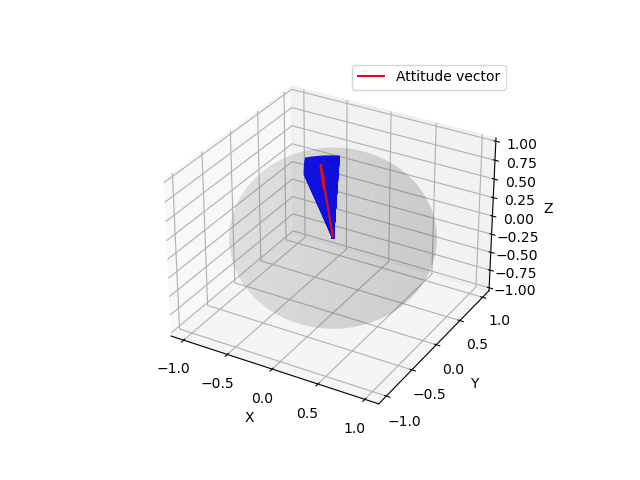

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the attitude vector to the plot
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red', label='Attitude vector', linewidth=1.5)

# Add the generated points on the circle to the plot
for points in rotated_points:
    ax.plot([0, points[0]], [0, points[1]], [0, points[2]], color='blue')

# Add a unit sphere to the plot
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='gray', alpha=0.1)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
ax.legend()

# Show the plot
plt.show()